In [1]:
import warnings

warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



In [2]:
# kaggle
# train_data_path = join("../input", "train.csv")
# sub_data_path = join("../input", "test.csv")

# local
train_data_path = join(".", "data", "train.csv")
sub_data_path = join(".", "data", "test.csv")


print(train_data_path)
print(sub_data_path)

.\data\train.csv
.\data\test.csv


## 1. Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í∏∞
pandasÏùò read_csv Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥Ïò§Í≥†, Í∞Å Î≥ÄÏàòÎì§Ïù¥ ÎÇòÌÉÄÎÇ¥Îäî ÏùòÎØ∏Î•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.
1. ID : ÏßëÏùÑ Íµ¨Î∂ÑÌïòÎäî Î≤àÌò∏
2. date : ÏßëÏùÑ Íµ¨Îß§Ìïú ÎÇ†Ïßú
3. price : ÌÉÄÍ≤ü Î≥ÄÏàòÏù∏ ÏßëÏùò Í∞ÄÍ≤©
4. bedrooms : Ïπ®Ïã§Ïùò Ïàò
5. bathrooms : Ïπ®Ïã§Îãπ ÌôîÏû•Ïã§ Í∞úÏàò
6. sqft_living : Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏
7. sqft_lot : Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏
8. floors : ÏßëÏùò Ï∏µ Ïàò
9. waterfront : ÏßëÏùò Ï†ÑÎ∞©Ïóê Í∞ïÏù¥ ÌùêÎ•¥ÎäîÏßÄ Ïú†Î¨¥ (a.k.a. Î¶¨Î≤ÑÎ∑∞)
10. view : ÏßëÏù¥ ÏñºÎßàÎÇò Ï¢ãÏïÑ Î≥¥Ïù¥ÎäîÏßÄÏùò Ï†ïÎèÑ
11. condition : ÏßëÏùò Ï†ÑÎ∞òÏ†ÅÏù∏ ÏÉÅÌÉú
12. grade : King County grading ÏãúÏä§ÌÖú Í∏∞Ï§ÄÏúºÎ°ú Îß§Í∏¥ ÏßëÏùò Îì±Í∏â
13. sqft_above : ÏßÄÌïòÏã§ÏùÑ Ï†úÏô∏Ìïú ÌèâÎ∞© ÌîºÌä∏
14. sqft_basement : ÏßÄÌïòÏã§Ïùò ÌèâÎ∞© ÌîºÌä∏
15. yr_built : ÏßëÏùÑ ÏßÄÏùÄ ÎÖÑÎèÑ
16. yr_renovated : ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌïú ÎÖÑÎèÑ
17. zipcode : Ïö∞Ìé∏Î≤àÌò∏
18. lat : ÏúÑÎèÑ
19. long : Í≤ΩÎèÑ
<!-- ÏûòÎ™ªÎêú ÏÑ§Î™ÖÏúºÎ°ú Î≥¥ÏûÑ -->
<!-- 20. sqft_living15 : 2015ÎÖÑ Í∏∞Ï§Ä Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå) -->
<!-- 21. sqft_lot15 : 2015ÎÖÑ Í∏∞Ï§Ä Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå) -->
20.  sqft_living15 : Í∑ºÏ≤ò 15 Í∞ÄÍµ¨Ïùò Ï£ºÍ±∞ Í≥µÍ∞Ñ, ÌèâÎ∞© ÌîºÌä∏
21.  sqft_lot15 : Í∑ºÏ≤ò 15Í∞ÄÍµ¨Ïùò Î∂ÄÏßÄ, ÌèâÎ∞© ÌîºÌä∏

In [3]:
################################
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
################################

data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)
print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))

original_data = data.copy()

y = data["price"]
data = data.drop("price", axis=1)

# y = data["price"]
# del data['price']

train_len = len(data)
data = pd.concat((data, sub), axis=0)

data.head()

train data dim : (15035, 21)
sub data dim : (6468, 20)


id             date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  20141013T000000         3       1.00         1180      5650     1.0   
1   1  20150225T000000         2       1.00          770     10000     1.0   
2   2  20150218T000000         3       2.00         1680      8080     1.0   
3   3  20140627T000000         3       2.25         1715      6819     2.0   
4   4  20150115T000000         3       1.50         1060      9711     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      6         770              0      1933   
2           0     0          3      8        1680              0      1987   
3           0     0          3      7        1715              0      1995   
4           0     0          3      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711

## 2. Í∞ÑÎã®Ìïú Ï†ÑÏ≤òÎ¶¨ 
Í∞Å Î≥ÄÏàòÎì§Ïóê ÎåÄÌï¥ Í≤∞Ï∏° Ïú†Î¨¥Î•º ÌôïÏù∏ÌïòÍ≥†, Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï¥Î≥¥Î©¥ÏÑú Í∞ÑÎã®ÌïòÍ≤å Ï†ÑÏ≤òÎ¶¨Î•º ÌïòÍ≤†ÏäµÎãàÎã§.
### Í≤∞Ï∏°Ïπò ÌôïÏù∏
Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäîÏßÄÎ•º ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.<br>
missingno ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò matrix Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥, Îç∞Ïù¥ÌÑ∞Ïùò Í≤∞Ï∏° ÏÉÅÌÉúÎ•º ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÏÇ¥Ìé¥Î≥º Ïàò ÏûàÏäµÎãàÎã§.

# of missing id: 0
# of missing date: 0
# of missing bedrooms: 0
# of missing bathrooms: 0
# of missing sqft_living: 0
# of missing sqft_lot: 0
# of missing floors: 0
# of missing waterfront: 0
# of missing view: 0
# of missing condition: 0
# of missing grade: 0
# of missing sqft_above: 0
# of missing sqft_basement: 0
# of missing yr_built: 0
# of missing yr_renovated: 0
# of missing zipcode: 0
# of missing lat: 0
# of missing long: 0
# of missing sqft_living15: 0
# of missing sqft_lot15: 0


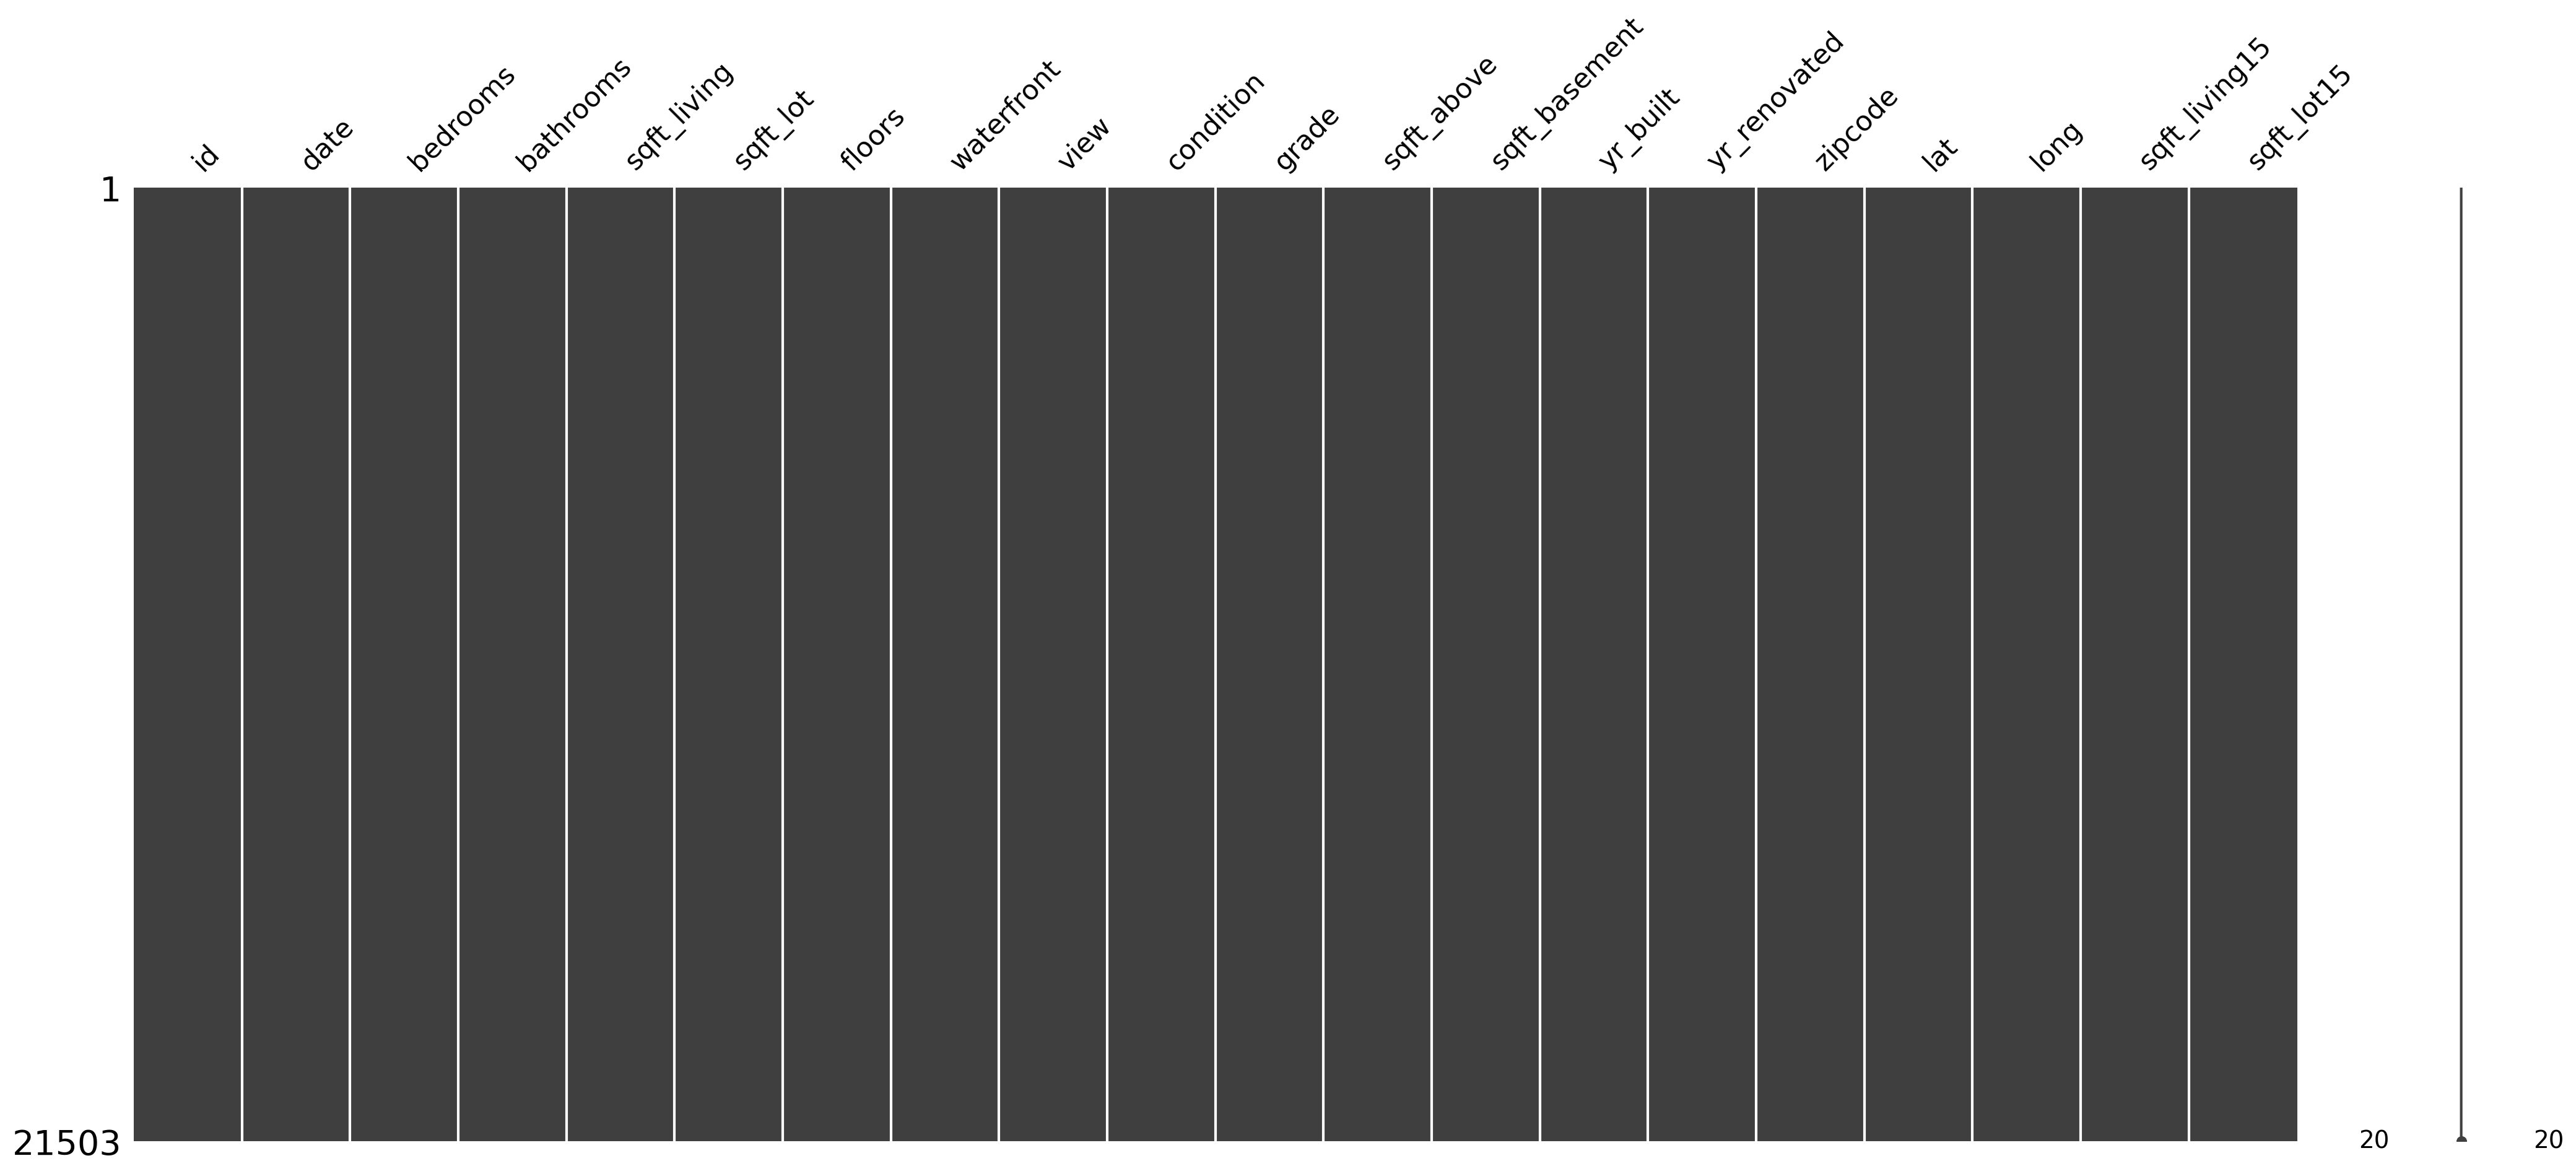

In [4]:
msno.matrix(data)


for col in data.columns:
    print("# of missing {}: {}".format(col, len(data.loc[pd.isnull(data[col]), col].values)))

Î™®Îì† Î≥ÄÏàòÏóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù¥ÏßÄÎßå, ÌòπÏãú Î™®Î•¥Îãà ÌôïÏã§ÌïòÍ≤å ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.<br>

### id, date Î≥ÄÏàò Ï†ïÎ¶¨
id Î≥ÄÏàòÎäî Î™®Îç∏Ïù¥ ÏßëÍ∞íÏùÑ ÏòàÏ∏°ÌïòÎäîÎç∞ ÎèÑÏõÄÏùÑ Ï£ºÏßÄ ÏïäÏúºÎØÄÎ°ú Ï†úÍ±∞Ìï©ÎãàÎã§.<br>
date Î≥ÄÏàòÎäî Ïó∞ÏõîÏùºÏãúÍ∞ÑÏúºÎ°ú Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎäîÎç∞, Ïó∞ÏõîÎßå Í≥†Î†§ÌïòÎäî Î≤îÏ£ºÌòï Î≥ÄÏàòÎ°ú ÎßåÎì§Í≤†ÏäµÎãàÎã§.

In [5]:
# ÏòàÏ∏°Í≤∞Í≥º Ï†úÏ∂úÏùÑ ÏúÑÌï¥ Ï†ÄÏû• ÌõÑ Ï†úÍ±∞
sub_id = data['id'][train_len:]

# del data['id']
data = data.drop("id", axis=1)

# 20141013T000000 -> 201410
data["date"] = data["date"].apply(lambda x: str(x[:6])).astype(str)

data.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  201410         3       1.00         1180      5650     1.0           0   
1  201502         2       1.00          770     10000     1.0           0   
2  201502         3       2.00         1680      8080     1.0           0   
3  201406         3       2.25         1715      6819     2.0           0   
4  201501         3       1.50         1060      9711     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      6         770              0      1933             0   
2     0          3      8        1680              0      1987             0   
3     0          3      7        1715              0      1995             0   
4     0          3      7        1060              0      1963             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98028  47.7379 -122.233           2720        8062  
2    98074  47.6168 -122.045           1800        7503  
3    98003  47.3097 -122.327           2238        6819  
4    98198  47.4095 -122.315           1650        9711

### Í∞Å Î≥ÄÏàòÎì§Ïùò Î∂ÑÌè¨ ÌôïÏù∏
ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Î∂ÑÌè¨Îäî Î™®Îç∏Ïù¥ Í≤∞Í≥ºÎ•º ÏòàÏ∏°ÌïòÍ∏∞Ïóê Ï¢ãÏßÄ ÏïäÏùÄ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎØÄÎ°ú Îã§Îì¨Ïñ¥Ï§Ñ ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§.

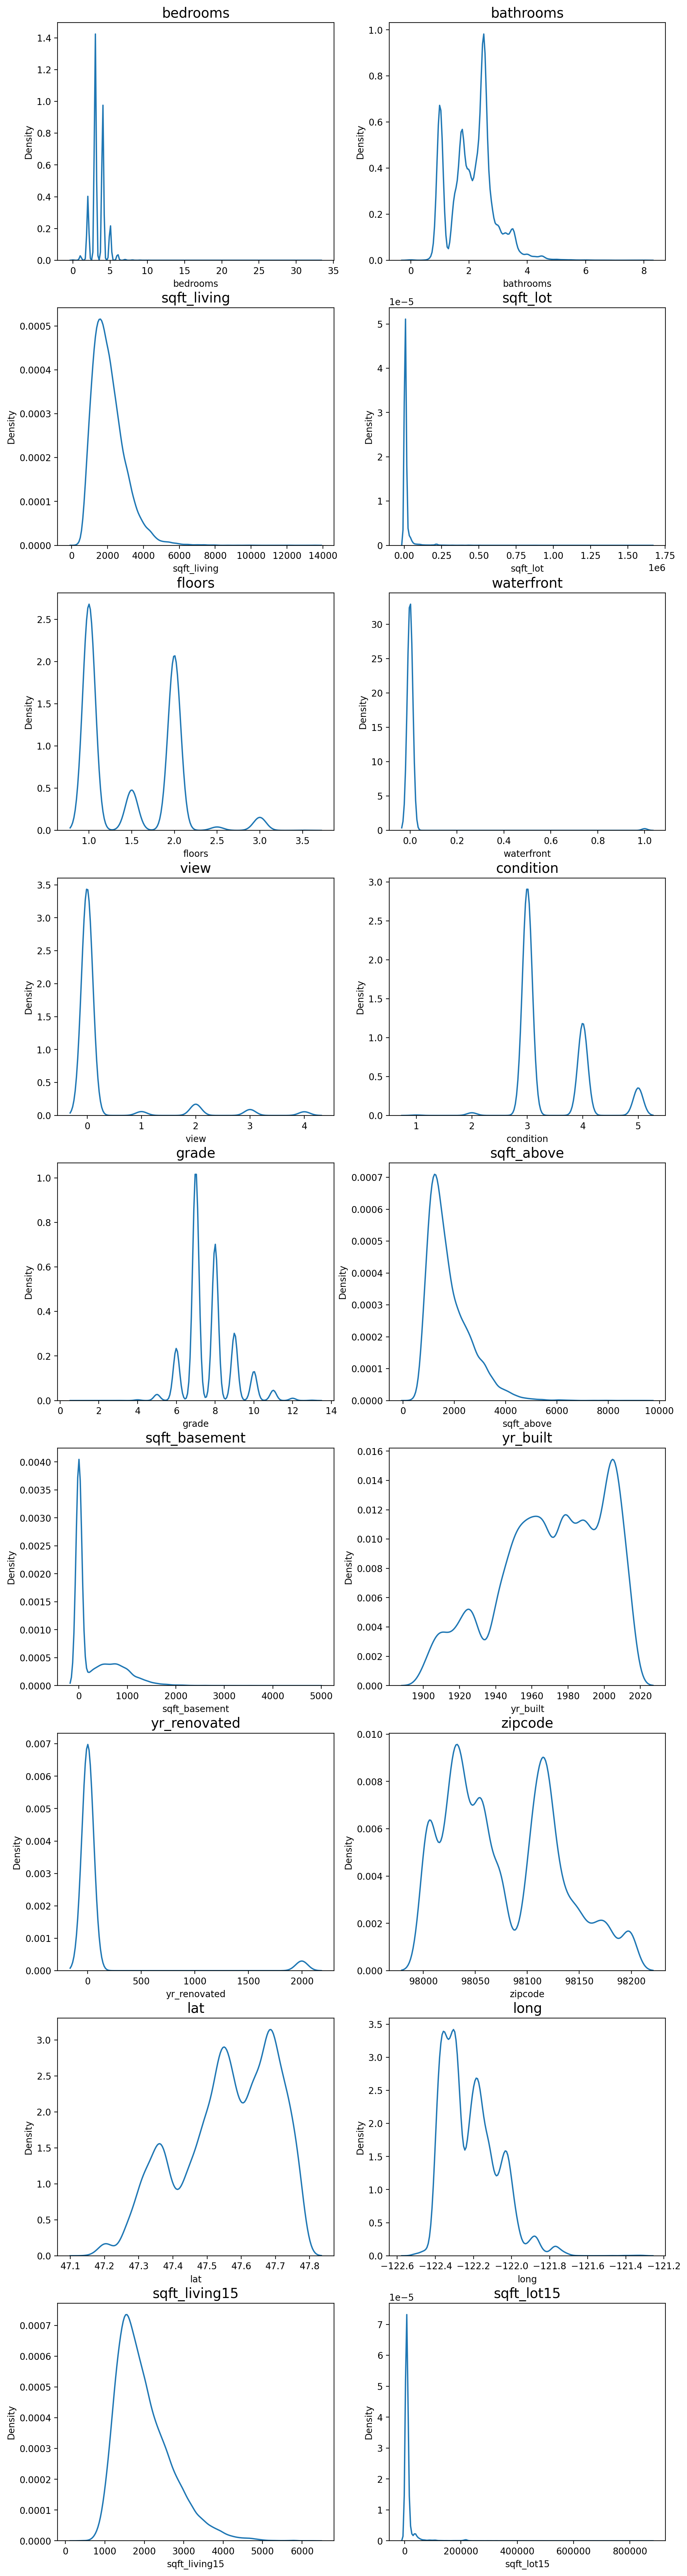

In [6]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))
# Í∞ÄÎ°úÏä§ÌÅ¨Î°§ ÎïåÎ¨∏Ïóê Í∑∏ÎûòÌîÑ ÌôïÏù∏Ïù¥ Î∂àÌé∏ÌïòÎã§Î©¥ figsizeÏùò xÍ∞íÏùÑ Ï°∞Ï†àÌï¥ Î≥¥ÏÑ∏Ïöî.

# id Î≥ÄÏàò(count==0Ïù∏ Í≤ΩÏö∞)Îäî Ï†úÏô∏ÌïòÍ≥† Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï©ÎãàÎã§.
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19:
            break

`price`, `bedrooms`, `sqft_living`, `sqft_lot`, `sqft_above`, `sqft_basement` Î≥ÄÏàòÍ∞Ä ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Í≤ΩÌñ•ÏùÑ Î≥¥ÏòÄÏäµÎãàÎã§. log-scalingÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπùÍ≤å ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§.

In [7]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for col in skew_columns:
    data[col] = np.log1p(data[col].values)

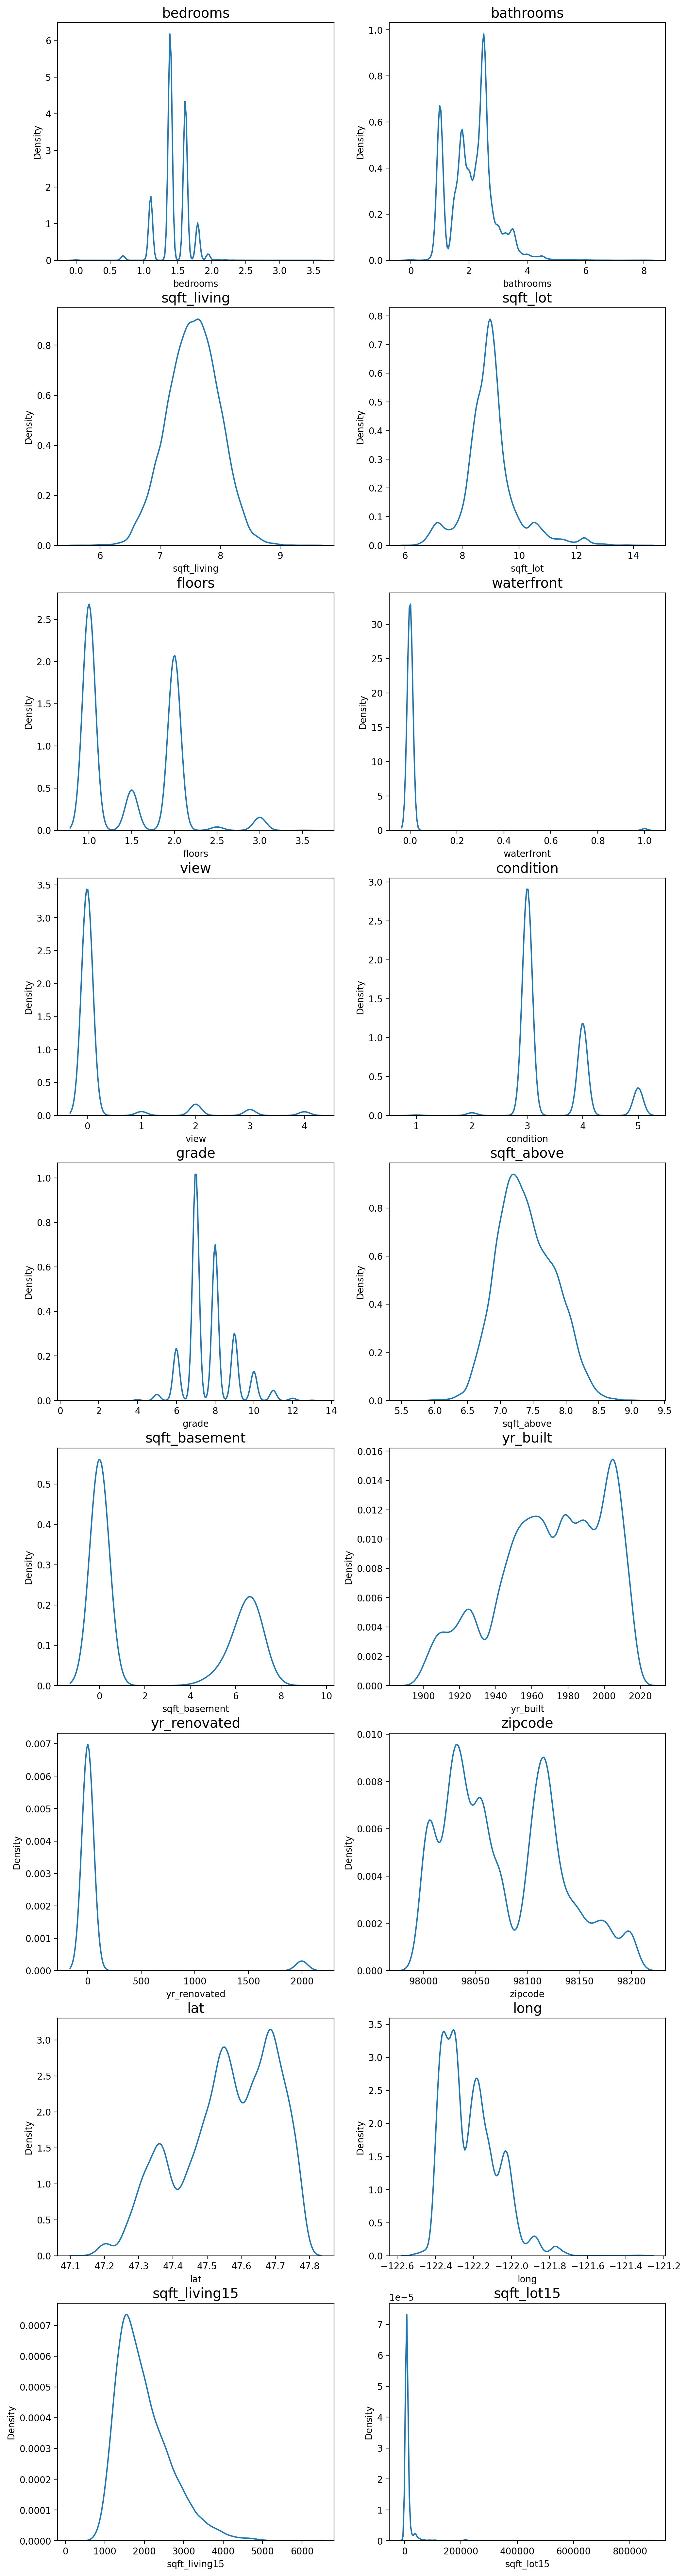

In [8]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))
# Í∞ÄÎ°úÏä§ÌÅ¨Î°§ ÎïåÎ¨∏Ïóê Í∑∏ÎûòÌîÑ ÌôïÏù∏Ïù¥ Î∂àÌé∏ÌïòÎã§Î©¥ figsizeÏùò xÍ∞íÏùÑ Ï°∞Ï†àÌï¥ Î≥¥ÏÑ∏Ïöî.

# id Î≥ÄÏàò(count==0Ïù∏ Í≤ΩÏö∞)Îäî Ï†úÏô∏ÌïòÍ≥† Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï©ÎãàÎã§.
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19:
            break

Ïñ¥ÎäêÏ†ïÎèÑ ÏπòÏö∞Ïπ®Ïù¥ Ï§ÑÏñ¥Îì† Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

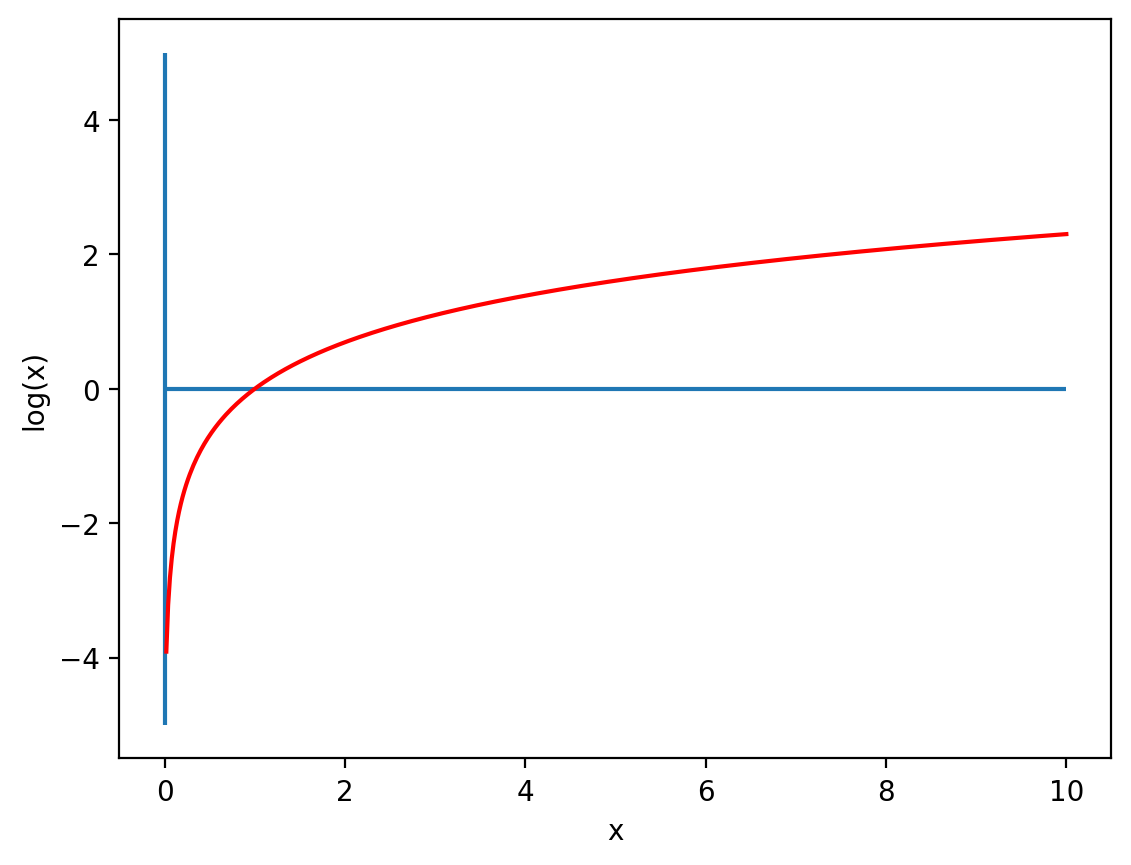

In [9]:
xx = np.linspace(0, 10, 500)
yy = np.log(xx)

plt.hlines(0, 0, 10)
plt.vlines(0, -5, 5)
plt.plot(xx, yy, c="r")
plt.xlabel("x")
plt.ylabel("log(x)")
plt.show()

In [10]:
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]


sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

print(x.shape)
print(sub.shape)

x.head()

(15035, 19)
(6468, 19)


date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  201410  1.386294       1.00     7.074117  8.639588     1.0           0   
1  201502  1.098612       1.00     6.647688  9.210440     1.0           0   
2  201502  1.386294       2.00     7.427144  8.997271     1.0           0   
3  201406  1.386294       2.25     7.447751  8.827615     2.0           0   
4  201501  1.386294       1.50     6.966967  9.181118     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7    7.074117            0.0      1955             0   
1     0          3      6    6.647688            0.0      1933             0   
2     0          3      8    7.427144            0.0      1987             0   
3     0          3      7    7.447751            0.0      1995             0   
4     0          3      7    6.966967            0.0      1963             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98028  47.7379 -122.233           2720        8062  
2    98074  47.6168 -122.045           1800        7503  
3    98003  47.3097 -122.327           2238        6819  
4    98198  47.4095 -122.315           1650        9711

## 3. Î™®Îç∏ÎßÅ
### Average Blending
Ïó¨Îü¨Í∞ÄÏßÄ Î™®Îç∏Ïùò Í≤∞Í≥ºÎ•º ÏÇ∞Ïà† ÌèâÍ∑†ÏùÑ ÌÜµÌï¥ Blending Î™®Îç∏ÏùÑ ÎßåÎì§Í≤†ÏäµÎãàÎã§.

In [11]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [
    {"model": gboost, "name": "GradientBoosting"},
    {"model": xgboost, "name": "XGBoost"},
    {"model": lightgbm, "name": "LightGBM"},
]

print("Ïñçüí¢")

Ïñçüí¢


### Cross Validation
ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÌÜµÌï¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Í∞ÑÎã®Ìûà ÌèâÍ∞ÄÌïòÍ≤†ÏäµÎãàÎã§.

In [12]:
def get_cv_score(models):
    kfold = KFold(n_splits=5).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m["model"], X=x.values, y=y, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")


print("Ïñçüí¢")

get_cv_score(models)

Ïñçüí¢


Model: GradientBoosting, CV score:0.8597
Model: XGBoost, CV score:0.8763
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2296
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 19
[LightGBM] [Info] Start training from score 540497.991270
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2327
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 19
[LightGBM] [Info] Start training from score 542956.681826
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightG

### Í≤∞Í≥º
- Model: GradientBoosting, CV score:0.8597
- Model: XGBoost, CV score:0.8763
- Model: LightGBM, CV score:0.8819

Í≤∞Ï†ïÍ≥ÑÏàò R squared https://ltlkodae.tistory.com/19


### Make Submission

ÌöåÍ∑Ä Î™®Îç∏Ïùò Í≤ΩÏö∞ÏóêÎäî cross_val_score Ìï®ÏàòÍ∞Ä R<sup>2</sup>Î•º Î∞òÌôòÌï©ÎãàÎã§.<br>
R<sup>2</sup> Í∞íÏù¥ 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Ïûò ÌëúÌòÑÌï®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. 3Í∞ú Ìä∏Î¶¨ Î™®Îç∏Ïù¥ ÏÉÅÎãπÌûà ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Í¥úÏ∞ÆÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïó¨Ï£ºÍ≥† ÏûàÏäµÎãàÎã§.<br> ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú 3Í∞ú Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Í≥†, Average BlendingÏùÑ ÌÜµÌï¥ Ï†úÏ∂ú Í≤∞Í≥ºÎ•º ÎßåÎì§Í≤†ÏäµÎãàÎã§.

In [13]:
def AveragingBlending(models, x, y, sub_x):
    for m in models:
        m["model"].fit(x.values, y)

    predictions = np.column_stack([m["model"].predict(sub_x.values) for m in models])
    return np.mean(predictions, axis=1)


print("Ïñçüí¢")

Ïñçüí¢


In [14]:
y_pred = AveragingBlending(models, x, y, sub)
print(len(y_pred))
y_pred

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2338
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 540682.653143
6468


array([ 548944.53804912,  443655.17105951, 1345797.07909443, ...,
        457185.23303678,  339532.04977609,  422564.70651683])

In [15]:
sub = pd.DataFrame(data={"id": sub_id, "price": y_pred})
sub.head()
len(sub)

sub.to_csv("submission.csv", index=False)

# Restart (ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ ÏúÑÌï¥ Îã§Ïãú Ï≤òÏùåÎ∂ÄÌÑ∞ ÏãúÏûëÌï¥Î≥¥Í∏∞)


In [16]:
# data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
# train_data_path = join(data_dir, 'train.csv')
# test_data_path = join(data_dir, 'test.csv')


# local
train_data_path = join(".", "data", "train.csv")
test_data_path = join(".", "data", "test.csv")


print(train_data_path)
print(test_data_path)


train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)


train.head()

.\data\train.csv
.\data\test.csv


id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000  221900.0         3       1.00         1180      5650   
1   1  20150225T000000  180000.0         2       1.00          770     10000   
2   2  20150218T000000  510000.0         3       2.00         1680      8080   
3   3  20140627T000000  257500.0         3       2.25         1715      6819   
4   4  20150115T000000  291850.0         3       1.50         1060      9711   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     1.0           0     0  ...      6         770              0      1933   
2     1.0           0     0  ...      8        1680              0      1987   
3     2.0           0     0  ...      7        1715              0      1995   
4     1.0           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [17]:
train.head()
train["date"] = train["date"].apply(lambda i: i[:6]).astype(int)

y = train["price"]
del train["price"]
del train["id"]

print(train.columns)
train.head()


## test Îç∞Ïù¥ÌÑ∞ÏóêÎèÑ ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©
test.head()
test["date"] = test["date"].apply(lambda i: i[:6]).astype(int)
del test["id"]
print(test.columns)
test.head()

print(test.columns)

y.head()
# Í∞íÏù¥ Îß§Ïö∞ ÌÅ¨Í≤åÎÇòÏò§Í≥† narrow Î∂ÑÌè¨ÏûÑÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå
print(y)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032

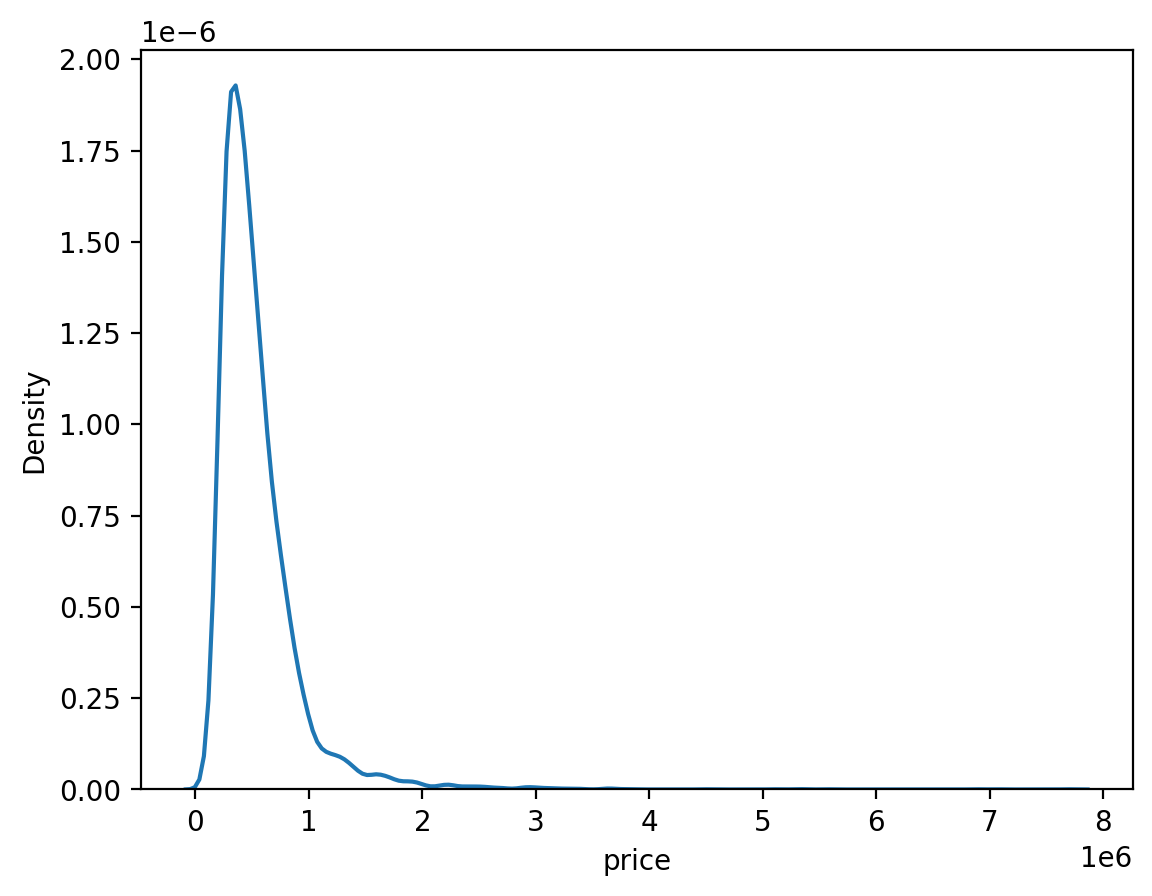

In [18]:
sns.kdeplot(y)
plt.show()

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64


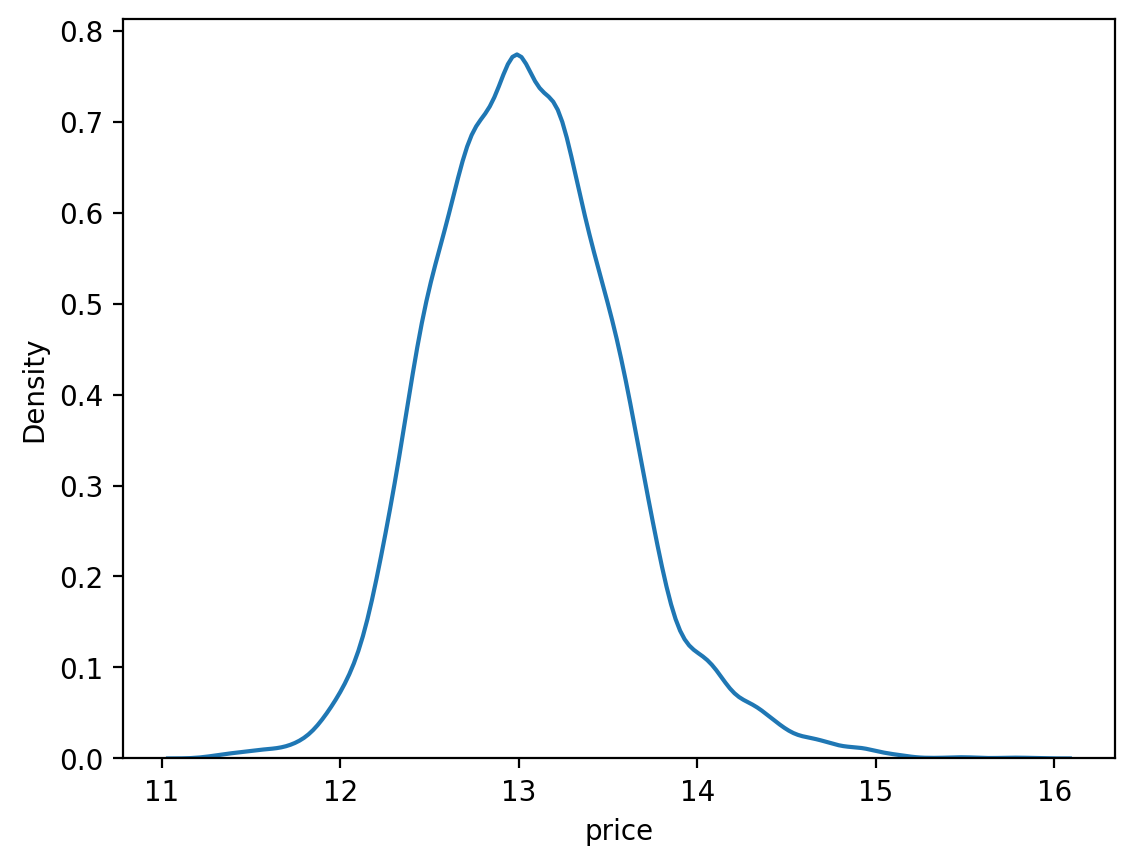

In [19]:
y = np.log1p(y)
print(y)
sns.kdeplot(y)
plt.show()

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int32  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           6468 non-null   int32  
 1   bedrooms       6468 non-null   int64  
 2   bathrooms      6468 non-null   float64
 3   sqft_living    6468 non-null   int64  
 4   sqft_lot       6468 non-null   int64  
 5   floors         6468 non-null   float64
 6   waterfront     6468 non-null   int64  
 7   view           6468 non-null   int64  
 8   condition      6468 non-null   int64  
 9   grade          6468 non-null   int64  
 10  sqft_above     6468 non-null   int64  
 11  sqft_basement  6468 non-null   int64  
 12  yr_built       6468 non-null   int64  
 13  yr_renovated   6468 non-null   int64  
 14  zipcode        6468 non-null   int64  
 15  lat            6468 non-null   float64
 16  long           6468 non-null   float64
 17  sqft_living15  6468 non-null   int64  
 18  sqft_lot

In [22]:
# RMSE Í≥ÑÏÇ∞

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))


# random_stateÎäî Î™®Îç∏Ï¥àÍ∏∞ÌôîÎÇò Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±Ïóê ÏÇ¨Ïö©ÎêòÎäî ÎûúÎç§ ÏãúÎìúÍ∞íÏûÖÎãàÎã§.
# random_state=None    # Ïù¥Í≤å Ï¥àÍ∏∞Í∞íÏûÖÎãàÎã§. ÏïÑÎ¨¥Í≤ÉÎèÑ ÏßÄÏ†ïÌïòÏßÄ ÏïäÍ≥† NoneÏùÑ ÎÑòÍ≤®Ï£ºÎ©¥ Î™®Îç∏ ÎÇ¥Î∂ÄÏóêÏÑú ÏûÑÏùòÎ°ú ÏÑ†ÌÉùÌï©ÎãàÎã§.
random_state = 2020  # ÌïòÏßÄÎßå Ïö∞Î¶¨Îäî Ïù¥Î†áÍ≤å Í≥†Ï†ïÍ∞íÏùÑ ÏÑ∏ÌåÖÌï¥ ÎëêÍ≤†ÏäµÎãàÎã§.

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]


print(gboost.__class__.__name__)
print(xgboost.__class__.__name__)
print(lightgbm.__class__.__name__)
print(rdforest.__class__.__name__)

GradientBoostingRegressor
XGBRegressor
LGBMRegressor
RandomForestRegressor


In [23]:
df = {}

for model in models:
    # Î™®Îç∏ Ïù¥Î¶Ñ ÌöçÎìù
    model_name = model.__class__.__name__

    # train, test Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨
    # random_stateÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≥†Ï†ïÌïòÍ≥† trainÍ≥º test ÏÖãÏùò ÎπÑÏú®ÏùÄ 8:2Î°ú Ìï©ÎãàÎã§.
    # [[YOUR CODE]]
    X_train, X_test, y_train, y_test = train_test_split(
        train, y, test_size=0.2, random_state=42
    )

    # Î™®Îç∏ ÌïôÏäµ
    model.fit(X_train, y_train)

    # ÏòàÏ∏°
    y_pred = model.predict(X_test)

    # ÏòàÏ∏° Í≤∞Í≥ºÏùò RMSE Í∞í Í≥ÑÏÇ∞ Î∞è Ï†ÄÏû•
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    df[model_name] = rmse

    # data frameÏóê Ï†ÄÏû•
    score_df = pd.DataFrame(df, index=["RMSE"]).T.sort_values("RMSE", ascending=True)
    print(score_df)


df

                               RMSE
GradientBoostingRegressor  0.185512
                               RMSE
XGBRegressor               0.175057
GradientBoostingRegressor  0.185512
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2298
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 19
[LightGBM] [Info] Start training from score 13.047364
                               RMSE
LGBMRegressor              0.168297
XGBRegressor               0.175057
GradientBoostingRegressor  0.185512
                               RMSE
LGBMRegressor              0.168297
XGBRegressor               0.175057
RandomForestRegressor      0.181294
GradientBoostingRegressor  0.185512


{'GradientBoostingRegressor': 0.18551172945380454,
 'XGBRegressor': 0.175057277624652,
 'LGBMRegressor': 0.16829743100562075,
 'RandomForestRegressor': 0.18129413011152762}

In [24]:
def get_scores(models, X, y):
    # Í≤∞Í≥º Ï†ÄÏû•Ïö© ÎîïÏÖîÎÑàÎ¶¨
    df = {}

    for model in models:
        # Î™®Îç∏ Ïù¥Î¶Ñ ÌöçÎìù
        model_name = model.__class__.__name__

        # train, test Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Î™®Îç∏ ÌïôÏäµ
        model.fit(X_train, y_train)

        # ÏòàÏ∏°
        y_pred = model.predict(X_test)

        # ÏòàÏ∏° Í≤∞Í≥ºÏùò RMSE Í∞í Í≥ÑÏÇ∞ Î∞è Ï†ÄÏû•
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        df[model_name] = rmse

    # Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ÄÏû• Î∞è Ï†ïÎ†¨
    score_df = pd.DataFrame(df, index=["RMSE"]).T.sort_values("RMSE", ascending=True)
    return score_df

get_scores(models, train, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2298
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 19
[LightGBM] [Info] Start training from score 13.047364


RMSE
LGBMRegressor              0.168297
XGBRegressor               0.175057
RandomForestRegressor      0.181294
GradientBoostingRegressor  0.185512

### Hyperparameter tuning using `GridSearchCV`

In [25]:
from sklearn.model_selection import GridSearchCV

# param_grid : ÌÉêÏÉâÌï† ÌååÎùºÎØ∏ÌÑ∞Ïùò Ï¢ÖÎ•ò (ÎîïÏÖîÎÑàÎ¶¨Î°ú ÏûÖÎ†•)
# scoring : Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï† ÏßÄÌëú
# cv : cross validationÏùÑ ÏàòÌñâÌïòÍ∏∞ ÏúÑÌï¥ train Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎÇòÎàÑÎäî Ï°∞Í∞ÅÏùò Í∞úÏàò
# verbose : Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÏßÑÌñâÌïòÎ©¥ÏÑú ÏßÑÌñâ Í≥ºÏ†ïÏùÑ Ï∂úÎ†•Ìï¥ÏÑú Î≥¥Ïó¨Ï§Ñ Î©îÏÑ∏ÏßÄÏùò Ïñë (Ïà´ÏûêÍ∞Ä ÌÅ¥ÏàòÎ°ù Îçî ÎßéÏùÄ Î©îÏÑ∏ÏßÄÎ•º Ï∂úÎ†•Ìï©ÎãàÎã§.)
# n_jobs : Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÏßÑÌñâÌïòÎ©¥ÏÑú ÏÇ¨Ïö©Ìï† CPUÏùò Í∞úÏàò

param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [1, 10],
}

model = LGBMRegressor(random_state=random_state)


# Îã§ÏùåÍ≥º Í∞ôÏù¥ GridSearchCVÎ•º Ïù¥Ïö©Ìï¥ÏÑú grid_model Î™®Îç∏ÏùÑ Ï¥àÍ∏∞ÌôîÌïòÍ≥†, trainÍ≥º y Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ÏùÑ Í∞ÑÎã®Ìûà ÌïôÏäµÏãúÌÇ§Î©¥ param_grid ÎÇ¥Ïùò Î™®Îì† ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Ïùò Ï°∞Ìï©Ïóê ÎåÄÌï¥ Ïã§ÌóòÏù¥ ÏôÑÎ£åÎê©ÎãàÎã§.

# neg_mean_squared_error: ÏùåÏàòÍ∞íÏùÑ Í∞ÄÏßÄÎäî MSE Í∞í

grid_model = GridSearchCV(
    model,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=1,
    n_jobs=5,
)

grid_model.fit(train, y)

grid_model.cv_results_

params = grid_model.cv_results_["params"]
print()
print()
print(params)

score = grid_model.cv_results_["mean_test_score"]
print(score)

results = pd.DataFrame(params)
# negative MSEÎ°ú Í≥ÑÏÇ∞Îêú score
results["score"] = score

results

# negative MSE Î•º RMSEÎ°ú Î≥ÄÌôò
results["RMSE"] = np.sqrt(-1 * results["score"])
results

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2338
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 13.048122


[{'max_depth': 1, 'n_estimators': 50}, {'max_depth': 1, 'n_estimators': 100}, {'max_depth': 10, 'n_estimators': 50}, {'max_depth': 10, 'n_estimators': 100}]
[-0.07339447 -0.05502043 -0.02917734 -0.02702714]


max_depth  n_estimators     score      RMSE
0          1            50 -0.073394  0.270914
1          1           100 -0.055020  0.234564
2         10            50 -0.029177  0.170814
3         10           100 -0.027027  0.164399

In [26]:
results = results.rename(columns={"RMSE": "RMSLE"})
results

results = results.sort_values("RMSLE")
results

max_depth  n_estimators     score     RMSLE
3         10           100 -0.027027  0.164399
2         10            50 -0.029177  0.170814
1          1           100 -0.055020  0.234564
0          1            50 -0.073394  0.270914

In [27]:
"""
Îã§ÏùåÍ≥º Í∞ôÏùÄ Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï† Ïàò ÏûàÎäî `my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)` Ìï®ÏàòÎ•º Íµ¨ÌòÑÌï¥ Î≥¥ÏÑ∏Ïöî.

1. GridSearchCV Î™®Îç∏Î°ú `model`ÏùÑ Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.
2. Î™®Îç∏ÏùÑ fitting Ìï©ÎãàÎã§.
3. params, scoreÏóê Í∞Å Ï°∞Ìï©Ïóê ÎåÄÌïú Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï©ÎãàÎã§. 
4. Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±ÌïòÍ≥†, RMSLE Í∞íÏùÑ Ï∂îÍ∞ÄÌïú ÌõÑ Ï†êÏàòÍ∞Ä ÎÜíÏùÄ ÏàúÏÑúÎ°ú Ï†ïÎ†¨Ìïú `results`Î•º Î∞òÌôòÌï©ÎãàÎã§.
"""


# ÏΩîÎìú ÏûÖÎ†•
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV Î™®Îç∏Î°ú Ï¥àÍ∏∞Ìôî
    grid_model = GridSearchCV(
        model,
        param_grid=param_grid,
        scoring="neg_mean_squared_error",
        cv=5,
        verbose=verbose,
        n_jobs=n_jobs,
    )

    # Î™®Îç∏ fitting
    grid_model.fit(train, y)

    # Í≤∞Í≥ºÍ∞í Ï†ÄÏû•
    params = grid_model.cv_results_["params"]
    score = grid_model.cv_results_["mean_test_score"]

    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    results = pd.DataFrame(params)
    results["score"] = score

    # RMSLE Í∞í Í≥ÑÏÇ∞ ÌõÑ Ï†ïÎ†¨
    results["RMSLE"] = np.sqrt(-1 * results["score"])
    results = results.sort_values("RMSLE")

    return results

In [34]:
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [1, 10],
}

# model = LGBMRegressor(random_state=random_state)
# ÏúÑ Í≥ºÏ†ïÏóêÏÑú scoreÍ∞Ä Í∞ÄÏû• ÎÜíÍ≤å ÎÇòÏò® ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º ÏÇ¨Ïö©: max_depth=10, n_estimators=100
max_depth = 10
n_estimators = 100
model = LGBMRegressor(
    max_depth=max_depth, n_estimators=n_estimators, random_state=random_state
)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

# --------------------------------
# --------------------------------
# --------------------------------
# --------------------------------

# model.fit(train, y)
# test.head()

# prediction = model.predict(test)
# prediction
# len(prediction)

# prediction = np.expm1(prediction)
# prediction

# # >> kaggle
# # data_dir = os.getenv("HOME") + "/aiffel/kaggle_kakr_housing/data"
# # >> local
# data_dir = join(".", "data")

# submission_path = join(data_dir, "sample_submission.csv")
# submission = pd.read_csv(submission_path)
# # submission.head()
# # ÎçÆÏñ¥ÏîåÏö∞Í∏∞
# submission["price"] = prediction
# # submission.head()
# # Ï†ÄÏû•ÌïòÍ∏∞
# submission_csv_path = "{}/submission_{}_RMSLE_{}.csv".format(
#     data_dir, "lgbm", "0.164399"
# )
# submission.to_csv(submission_csv_path, index=False)
# print(submission_csv_path)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2338
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 13.048122


max_depth  n_estimators     score     RMSLE
3         10           100 -0.027027  0.164399
2         10            50 -0.029177  0.170814
1          1           100 -0.055020  0.234564
0          1            50 -0.073394  0.270914

In [46]:
"""
ÏïÑÎûòÏùò Í≥ºÏ†ïÏùÑ ÏàòÌñâÌïòÎäî `save_submission(model, train, y, test, model_name, rmsle)` Ìï®ÏàòÎ•º Íµ¨ÌòÑÌï¥ Ï£ºÏÑ∏Ïöî.
1. Î™®Îç∏ÏùÑ `train`, `y`Î°ú ÌïôÏäµÏãúÌÇµÎãàÎã§.
2. `test`Ïóê ÎåÄÌï¥ ÏòàÏ∏°Ìï©ÎãàÎã§.
3. ÏòàÏ∏°Í∞íÏùÑ `np.expm1`ÏúºÎ°ú Î≥ÄÌôòÌïòÍ≥†, `submission_{model_name}_RMSLE_{rmsle}.csv` ÌòïÌÉúÏùò `csv` ÌååÏùºÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
"""

# ÏΩîÎìú ÏûëÏÑ±


def save_submission(model, train, y, test, model_name, rmsle, submission_path):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    submission_path = join(data_dir, "sample_submission.csv")
    submission = pd.read_csv(submission_path)
    submission["price"] = prediction
    submission_csv_path = "{}/submission_{}_RMSLE_{}.csv".format(
        data_dir, model_name, rmsle
    )
    submission.to_csv(submission_csv_path, index=False)
    print("{} saved!".format(submission_csv_path))


# data_dir = os.getenv("HOME") + "/aiffel/kaggle_kakr_housing/data"
data_dir = join(".", "data")
save_submission(model, train, y, test, "lgbm", "0.164399", data_dir)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2338
[LightGBM] [Info] Number of data points in the train set: 15035, number of used features: 19
[LightGBM] [Info] Start training from score 13.048122
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
.\data/submission_lgbm_RMSLE_0.164399.csv saved!


### ÌöåÍ≥†
- 